<a href="https://colab.research.google.com/github/YungKing1224/Python-data-science/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Class

0 ---> legit transaction
1 ---> fraudulent transaction

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df.shape

(89220, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89220 entries, 0 to 89219
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    89220 non-null  int64  
 1   V1      89220 non-null  float64
 2   V2      89220 non-null  float64
 3   V3      89220 non-null  float64
 4   V4      89220 non-null  float64
 5   V5      89220 non-null  float64
 6   V6      89220 non-null  float64
 7   V7      89220 non-null  float64
 8   V8      89220 non-null  float64
 9   V9      89219 non-null  float64
 10  V10     89219 non-null  float64
 11  V11     89219 non-null  float64
 12  V12     89219 non-null  float64
 13  V13     89219 non-null  float64
 14  V14     89219 non-null  float64
 15  V15     89219 non-null  float64
 16  V16     89219 non-null  float64
 17  V17     89219 non-null  float64
 18  V18     89219 non-null  float64
 19  V19     89219 non-null  float64
 20  V20     89219 non-null  float64
 21  V21     89219 non-null  float64
 22

In [5]:
df['Class'].value_counts()

,count
Class,
0.0,89008
1.0,211


The data is unbalanced so we need to divide then combine it

In [6]:
df_class_0 = df[df['Class'] == 0]
df_class_0.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
df_sampled_class_0 = df_class_0.sample(500)
df_sampled_class_0.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
60148,49178,1.215750,0.274357,-0.286885,0.957648,0.271575,-0.560570,0.463580,-0.273277,-0.154340,-0.014610,-1.049846,0.182755,0.595384,0.340901,0.792725,0.147836,-0.688911,-0.079101,0.014571,0.013433,-0.048012,-0.183545,-0.248769,-0.431124,0.837583,-0.313385,-0.004352,0.018331,55.91,0.0
81419,58925,-1.852345,1.849874,0.953024,-1.886271,-0.036611,-0.609384,0.791765,-0.311138,1.446174,2.174642,1.409816,0.838563,0.642561,-0.992715,-0.071837,0.579581,-1.380696,-0.030937,-0.553133,1.115865,-0.357713,-0.248189,-0.064652,0.028155,0.081762,0.685660,0.449446,0.022195,0.75,0.0
78151,57393,-2.093042,1.432643,1.293036,-0.999317,-1.110575,-0.444291,-0.218169,0.636820,0.989592,0.561742,0.791657,0.662321,-0.823725,-0.258293,-1.102905,0.311342,-0.324983,0.234554,-0.254268,0.250284,0.062591,0.589499,-0.150629,0.595298,-0.123412,0.898258,-0.238298,-0.220716,11.99,0.0
2458,2023,0.650007,-0.751627,0.402706,1.266285,-0.709522,-0.182776,0.146801,-0.159998,0.236575,-0.202011,-0.717115,0.616660,1.352003,-0.111745,1.198619,0.555664,-0.834887,0.371690,-0.519285,0.578105,0.336656,0.407695,-0.441811,-0.059990,0.528267,-0.264903,-0.001430,0.082557,308.98,0.0
50811,44660,-0.936779,0.895160,2.048441,-0.576161,-0.006946,-0.781500,0.665379,0.075985,-0.608147,-0.522842,1.194544,-0.019188,-1.470841,0.569984,-0.088446,0.645648,-0.732906,0.159601,-0.384871,-0.180063,-0.138478,-0.683892,-0.147154,0.477853,0.105282,-0.028430,-0.170415,0.062559,0.89,0.0


In [8]:
df_class_1 = df[df['Class'] == 1]
df_class_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0


In [9]:
df_combined = pd.concat([df_sampled_class_0, df_class_1], axis = 0)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 60148 to 89190
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    711 non-null    int64  
 1   V1      711 non-null    float64
 2   V2      711 non-null    float64
 3   V3      711 non-null    float64
 4   V4      711 non-null    float64
 5   V5      711 non-null    float64
 6   V6      711 non-null    float64
 7   V7      711 non-null    float64
 8   V8      711 non-null    float64
 9   V9      711 non-null    float64
 10  V10     711 non-null    float64
 11  V11     711 non-null    float64
 12  V12     711 non-null    float64
 13  V13     711 non-null    float64
 14  V14     711 non-null    float64
 15  V15     711 non-null    float64
 16  V16     711 non-null    float64
 17  V17     711 non-null    float64
 18  V18     711 non-null    float64
 19  V19     711 non-null    float64
 20  V20     711 non-null    float64
 21  V21     711 non-null    float64
 22  V

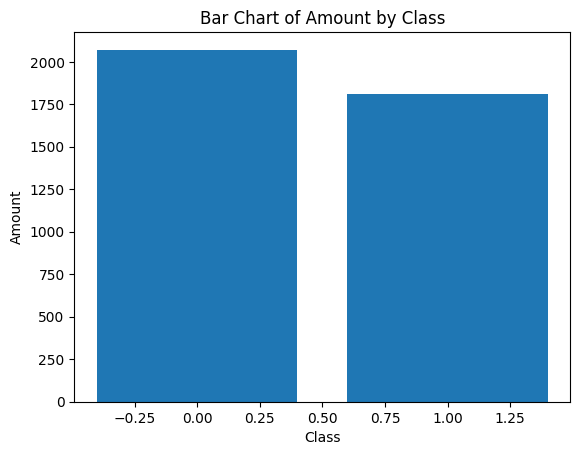

In [10]:
plt.bar(x = df_combined['Class'], height = df_combined['Amount'])
plt.xlabel('Class')
plt.ylabel('Amount')
plt.title('Bar Chart of Amount by Class')
plt.show()

In [11]:
df_combined.groupby(df_combined['Class']).mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,39754.424000,-0.266637,0.064706,0.740669,0.182272,-0.331933,0.040384,0.008242,0.095997,0.038962,0.004362,0.233421,-0.087377,0.069240,0.084143,0.182295,-0.058934,0.100602,-0.041532,-0.012744,0.066936,-0.037769,-0.124726,-0.037111,0.017753,0.119194,0.046282,0.013492,-0.009467,98.52614
1.0,35061.473934,-6.271827,4.319926,-8.267835,5.039289,-4.531270,-1.894723,-6.560321,2.863511,-2.998676,-6.378818,4.584475,-7.290152,0.021633,-7.775010,0.233328,-4.991225,-8.475700,-3.068546,0.800665,0.373573,0.740737,-0.137542,-0.236394,-0.102067,0.214617,0.094634,0.544401,0.042124,106.71436


In [12]:
df_combined.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,38361.720113,-2.048768,1.327507,-1.932741,1.623665,-1.578150,-0.533888,-1.941078,0.917298,-0.862503,-1.889943,1.524662,-2.224909,0.055112,-2.248179,0.197440,-1.522666,-2.444545,-0.939845,0.228648,0.157935,0.193265,-0.128530,-0.096251,-0.017805,0.147512,0.060631,0.171047,0.005844,100.956118,0.296765
std,16689.545491,5.180274,3.272298,6.182756,2.917075,3.901593,1.607213,4.702051,3.090532,2.142456,3.854961,2.653170,4.198330,1.059964,4.358700,0.933139,3.193902,5.642563,2.246476,1.167340,0.742096,0.853308,0.654661,0.944298,0.547587,0.622538,0.471152,0.709644,0.394143,242.873733,0.457154
min,32.000000,-30.552380,-10.347944,-31.103685,-4.010684,-22.105532,-5.080408,-21.922811,-9.108242,-9.283925,-18.271168,-2.829072,-17.769143,-3.157961,-19.214325,-3.505481,-13.563273,-25.162799,-9.498746,-3.602657,-4.922715,-2.475962,-2.719292,-19.254328,-1.764699,-4.781606,-1.105593,-3.908080,-4.284844,0.000000,0.000000
25%,28130.000000,-2.033357,-0.270851,-1.639025,-0.211300,-1.560878,-1.130431,-1.473937,-0.124419,-1.480466,-2.441198,-0.262377,-3.017760,-0.738421,-3.861825,-0.319678,-1.868642,-1.100895,-1.114694,-0.447403,-0.159674,-0.204863,-0.571437,-0.238196,-0.340576,-0.174361,-0.289007,-0.042031,-0.006913,2.690000,0.000000
50%,41259.000000,-0.687213,0.521004,0.395008,0.846077,-0.493965,-0.432331,-0.280238,0.124546,-0.421786,-0.317450,0.817165,-0.296817,0.088933,-0.234011,0.280108,-0.265007,-0.219143,-0.285666,0.099211,0.023370,0.006632,-0.089094,-0.059932,0.035446,0.154136,-0.013769,0.045917,0.032113,22.770000,0.000000
75%,51194.500000,1.048592,1.749291,1.191811,2.718972,0.185837,0.185514,0.368697,0.654258,0.414259,0.128226,2.311343,0.398149,0.736453,0.270313,0.831187,0.340272,0.333200,0.307987,0.839872,0.329708,0.371793,0.334484,0.077053,0.394832,0.472912,0.388164,0.318552,0.147008,96.640000,1.000000
max,62467.000000,1.566235,16.713389,3.454175,11.927512,5.674098,5.737883,5.811316,20.007208,4.030623,4.864892,12.018913,3.338871,3.574965,5.340705,3.566927,3.890838,7.766636,3.042493,5.228342,4.020654,6.235107,1.745315,4.188762,1.094516,2.208209,1.362646,3.052358,1.130625,2071.000000,1.000000


In [13]:
df_combined.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [14]:
df_combined['Amount'].std()

242.87373348980364

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_combined['Amount'] = scaler.fit_transform(df_combined[['Amount']])
df_combined.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
60148,49178,1.215750,0.274357,-0.286885,0.957648,0.271575,-0.560570,0.463580,-0.273277,-0.154340,-0.014610,-1.049846,0.182755,0.595384,0.340901,0.792725,0.147836,-0.688911,-0.079101,0.014571,0.013433,-0.048012,-0.183545,-0.248769,-0.431124,0.837583,-0.313385,-0.004352,0.018331,0.026997,0.0
81419,58925,-1.852345,1.849874,0.953024,-1.886271,-0.036611,-0.609384,0.791765,-0.311138,1.446174,2.174642,1.409816,0.838563,0.642561,-0.992715,-0.071837,0.579581,-1.380696,-0.030937,-0.553133,1.115865,-0.357713,-0.248189,-0.064652,0.028155,0.081762,0.685660,0.449446,0.022195,0.000362,0.0
78151,57393,-2.093042,1.432643,1.293036,-0.999317,-1.110575,-0.444291,-0.218169,0.636820,0.989592,0.561742,0.791657,0.662321,-0.823725,-0.258293,-1.102905,0.311342,-0.324983,0.234554,-0.254268,0.250284,0.062591,0.589499,-0.150629,0.595298,-0.123412,0.898258,-0.238298,-0.220716,0.005789,0.0
2458,2023,0.650007,-0.751627,0.402706,1.266285,-0.709522,-0.182776,0.146801,-0.159998,0.236575,-0.202011,-0.717115,0.616660,1.352003,-0.111745,1.198619,0.555664,-0.834887,0.371690,-0.519285,0.578105,0.336656,0.407695,-0.441811,-0.059990,0.528267,-0.264903,-0.001430,0.082557,0.149194,0.0
50811,44660,-0.936779,0.895160,2.048441,-0.576161,-0.006946,-0.781500,0.665379,0.075985,-0.608147,-0.522842,1.194544,-0.019188,-1.470841,0.569984,-0.088446,0.645648,-0.732906,0.159601,-0.384871,-0.180063,-0.138478,-0.683892,-0.147154,0.477853,0.105282,-0.028430,-0.170415,0.062559,0.000430,0.0


In [16]:
class_corr = df_combined.corr()['Class'].sort_values(ascending=True)
class_corr

,Class
V14,-0.824292
V12,-0.784306
V10,-0.756971
V16,-0.705975
V17,-0.694842
V3,-0.666090
V9,-0.648166
V7,-0.638624
V18,-0.615992
V6,-0.550419


In [17]:
threshold = 0.5

# Filter columns based on correlation values and include 'Amount'
filtered_corr = class_corr[(class_corr < -threshold) | (class_corr > threshold)].index
if 'Amount' not in filtered_corr:
    filtered_corr = filtered_corr.append(pd.Index(['Amount']))

# Use filtered_corr to filter your DataFrame
df_filtered = df_combined[filtered_corr]

filtered_corr

Index(['V14', 'V12', 'V10', 'V16', 'V17', 'V3', 'V9', 'V7', 'V18', 'V6', 'V1',
       'V2', 'V11', 'V4', 'Class', 'Amount'],
      dtype='object')

In [18]:
df_filtered.head()

,V14,V12,V10,V16,V17,V3,V9,V7,V18,V6,V1,V2,V11,V4,Class,Amount
60148,0.340901,0.182755,-0.014610,0.147836,-0.688911,-0.286885,-0.154340,0.463580,-0.079101,-0.560570,1.215750,0.274357,-1.049846,0.957648,0.0,0.026997
81419,-0.992715,0.838563,2.174642,0.579581,-1.380696,0.953024,1.446174,0.791765,-0.030937,-0.609384,-1.852345,1.849874,1.409816,-1.886271,0.0,0.000362
78151,-0.258293,0.662321,0.561742,0.311342,-0.324983,1.293036,0.989592,-0.218169,0.234554,-0.444291,-2.093042,1.432643,0.791657,-0.999317,0.0,0.005789
2458,-0.111745,0.616660,-0.202011,0.555664,-0.834887,0.402706,0.236575,0.146801,0.371690,-0.182776,0.650007,-0.751627,-0.717115,1.266285,0.0,0.149194
50811,0.569984,-0.019188,-0.522842,0.645648,-0.732906,2.048441,-0.608147,0.665379,0.159601,-0.781500,-0.936779,0.895160,1.194544,-0.576161,0.0,0.000430


In [19]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [20]:
model_params = {
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }},

    'rfc':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10]
        }
    },
    'lr':{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }},
        'dtc':{
            'model':DecisionTreeClassifier(),
            'params':{
                'criterion':['gini','entropy']
            }
        },
        'gnb':{
            'model':GaussianNB(),
            'params':{

            }
        },
        'mnb':{
            'model':MultinomialNB(),
            'params':{

            }
            }
            }

In [21]:
df_filtered.describe()

,V14,V12,V10,V16,V17,V3,V9,V7,V18,V6,V1,V2,V11,V4,Class,Amount
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,-2.248179,-2.224909,-1.889943,-1.522666,-2.444545,-1.932741,-0.862503,-1.941078,-0.939845,-0.533888,-2.048768,1.327507,1.524662,1.623665,0.296765,0.048748
std,4.358700,4.198330,3.854961,3.193902,5.642563,6.182756,2.142456,4.702051,2.246476,1.607213,5.180274,3.272298,2.653170,2.917075,0.457154,0.117274
min,-19.214325,-17.769143,-18.271168,-13.563273,-25.162799,-31.103685,-9.283925,-21.922811,-9.498746,-5.080408,-30.552380,-10.347944,-2.829072,-4.010684,0.000000,0.000000
25%,-3.861825,-3.017760,-2.441198,-1.868642,-1.100895,-1.639025,-1.480466,-1.473937,-1.114694,-1.130431,-2.033357,-0.270851,-0.262377,-0.211300,0.000000,0.001299
50%,-0.234011,-0.296817,-0.317450,-0.265007,-0.219143,0.395008,-0.421786,-0.280238,-0.285666,-0.432331,-0.687213,0.521004,0.817165,0.846077,0.000000,0.010995
75%,0.270313,0.398149,0.128226,0.340272,0.333200,1.191811,0.414259,0.368697,0.307987,0.185514,1.048592,1.749291,2.311343,2.718972,1.000000,0.046663
max,5.340705,3.338871,4.864892,3.890838,7.766636,3.454175,4.030623,5.811316,3.042493,5.737883,1.566235,16.713389,12.018913,11.927512,1.000000,1.000000


In [22]:
x = df_filtered.drop(['Class'],axis='columns')
y = df_filtered.Class

In [23]:
x.head()

,V14,V12,V10,V16,V17,V3,V9,V7,V18,V6,V1,V2,V11,V4,Amount
60148,0.340901,0.182755,-0.014610,0.147836,-0.688911,-0.286885,-0.154340,0.463580,-0.079101,-0.560570,1.215750,0.274357,-1.049846,0.957648,0.026997
81419,-0.992715,0.838563,2.174642,0.579581,-1.380696,0.953024,1.446174,0.791765,-0.030937,-0.609384,-1.852345,1.849874,1.409816,-1.886271,0.000362
78151,-0.258293,0.662321,0.561742,0.311342,-0.324983,1.293036,0.989592,-0.218169,0.234554,-0.444291,-2.093042,1.432643,0.791657,-0.999317,0.005789
2458,-0.111745,0.616660,-0.202011,0.555664,-0.834887,0.402706,0.236575,0.146801,0.371690,-0.182776,0.650007,-0.751627,-0.717115,1.266285,0.149194
50811,0.569984,-0.019188,-0.522842,0.645648,-0.732906,2.048441,-0.608147,0.665379,0.159601,-0.781500,-0.936779,0.895160,1.194544,-0.576161,0.000430


In [24]:
y.head()

,Class
60148,0.0
81419,0.0
78151,0.0
2458,0.0
50811,0.0


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler for scaling

scores = []
for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)

  # Scale the features to the range [0, 1]
  scaler = MinMaxScaler()
  x_scaled = scaler.fit_transform(x)

  clf.fit(x_scaled, y) # Fit the model with scaled data
  scores.append(
      {
          'model':model_name,
          'best_score':clf.best_score_,
          'best_params':clf.best_params_
      }
  )

In [27]:
df_score = pd.DataFrame(scores)
df_score

,model,best_score,best_params
0,svm,0.966237,"{'C': 20, 'kernel': 'rbf'}"
1,rfc,0.966246,{'n_estimators': 10}
2,lr,0.963430,{'C': 5}
3,dtc,0.946558,{'criterion': 'gini'}
4,gnb,0.956407,{}
5,mnb,0.797508,{}
